In [1]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.23.1'

Definição do problema de negócio

Prever o Customer Churn em uma Operadora de Telecom

Extraindo e Carregando os Dados

In [204]:
from pandas import read_csv
arquivo = 'data/projeto4_telecom_teste.csv'
dados = read_csv(arquivo)
print(dados.shape)

(1667, 21)


análise exploratória dos dados

In [205]:
dados.head(20)


,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
5,6,IA,117,area_code_415,no,no,0,226.5,85,38.51,...,68,12.04,223.0,90,10.04,6.9,5,1.86,1,no
6,7,ND,63,area_code_415,no,yes,32,218.9,124,37.21,...,125,18.22,260.3,120,11.71,12.9,3,3.48,1,no
7,8,LA,94,area_code_408,no,no,0,157.5,97,26.78,...,112,19.08,310.8,106,13.99,11.1,6,3.00,0,no
8,9,MO,138,area_code_510,no,no,0,89.1,117,15.15,...,46,10.78,190.5,71,8.57,9.9,4,2.67,2,no
9,10,TX,128,area_code_415,no,yes,43,177.8,100,30.23,...,89,12.52,194.2,92,8.74,11.9,1,3.21,0,no


In [206]:
dados.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [207]:
dados.groupby('churn').size()

churn
no     1443
yes     224
dtype: int64

In [208]:
dados.describe()

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,834.000000,98.646671,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,481.365765,39.400755,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,1.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,417.500000,72.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,834.000000,98.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,1250.500000,126.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,1667.000000,238.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


In [209]:
#verificar duplicados
dados.duplicated().sum()

0

In [210]:
dados.groupby('state').size()

state
AK    20
AL    44
AR    37
AZ    25
CA    18
CO    30
CT    25
DC    34
DE    33
FL    27
GA    29
HI    33
IA    25
ID    46
IL    30
IN    27
KS    29
KY    40
LA    31
MA    38
MD    32
ME    41
MI    30
MN    41
MO    30
MS    34
MT    31
NC    23
ND    26
NE    27
NH    39
NJ    44
NM    29
NV    24
NY    31
OH    38
OK    29
OR    36
PA    32
RI    34
SC    31
SD    25
TN    36
TX    44
UT    40
VA    41
VT    28
WA    32
WI    28
WV    52
WY    38
dtype: int64

In [211]:
#numero de estados
dados['state'].nunique()

51

In [212]:
dados.groupby('total_night_calls').size()

total_night_calls
0      1
12     1
38     1
40     1
41     1
      ..
160    1
161    1
165    1
168    1
170    1
Length: 121, dtype: int64

In [213]:
#estados com churning
g= dados[dados['churn'] == 'yes'].groupby(['state'])['churn'].count()
print(g)

state
AK     2
AL     5
AR     5
AZ     5
CA     5
CO     2
CT     4
DC     4
DE     6
FL     4
GA     2
HI     2
IA     5
ID     5
IL     2
IN     5
KS     5
KY     7
LA     3
MA     6
MD     4
ME     6
MI     2
MN     5
MO     5
MS     3
MT     7
NC     1
ND     4
NE     1
NH     3
NJ    10
NM     4
NV     3
NY     5
OH     5
OK     7
OR     7
RI     1
SC     2
SD     4
TN     9
TX     8
UT     6
VA     1
VT     2
WA    10
WI     1
WV    12
WY     2
Name: churn, dtype: int64


In [214]:
x= g.sort_values(ascending = False)[:15].reset_index()
print(x)

   state  churn
0     WV     12
1     WA     10
2     NJ     10
3     TN      9
4     TX      8
5     KY      7
6     OK      7
7     OR      7
8     MT      7
9     UT      6
10    MA      6
11    ME      6
12    DE      6
13    KS      5
14    IN      5


In [215]:
#grau de relação
dados.corr(method='pearson')

,Unnamed: 0,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
Unnamed: 0,1.000000,-0.044870,-0.032470,-0.011350,-0.007321,-0.011354,0.017334,0.002500,0.017335,-0.036053,-0.025064,-0.036037,-0.040373,0.005423,-0.040429,0.018808
account_length,-0.044870,1.000000,-0.038609,-0.014926,0.004267,-0.014927,-0.016229,-0.011114,-0.016241,0.019004,0.001250,0.018979,-0.014783,-0.000895,-0.014848,0.004126
number_vmail_messages,-0.032470,-0.038609,1.000000,0.016747,0.020015,0.016739,0.022495,0.000654,0.022480,-0.000367,-0.007417,-0.000348,0.003040,-0.031483,0.003116,0.006860
total_day_minutes,-0.011350,-0.014926,0.016747,1.000000,-0.007162,1.000000,-0.047466,-0.008110,-0.047467,0.027850,-0.031778,0.027848,-0.039961,-0.019653,-0.039876,0.036474
total_day_calls,-0.007321,0.004267,0.020015,-0.007162,1.000000,-0.007165,0.041946,-0.001453,0.041955,-0.040317,0.012572,-0.040303,-0.003924,0.021843,-0.003942,0.007379
total_day_charge,-0.011354,-0.014927,0.016739,1.000000,-0.007165,1.000000,-0.047471,-0.008107,-0.047473,0.027858,-0.031781,0.027856,-0.039969,-0.019660,-0.039884,0.036462
total_eve_minutes,0.017334,-0.016229,0.022495,-0.047466,0.041946,-0.047471,1.000000,0.031997,1.000000,-0.025248,0.024199,-0.025238,0.023836,0.019533,0.023977,-0.015317
total_eve_calls,0.002500,-0.011114,0.000654,-0.008110,-0.001453,-0.008107,0.031997,1.000000,0.032029,0.009887,-0.054494,0.009867,-0.041585,-0.018205,-0.041681,0.013998
total_eve_charge,0.017335,-0.016241,0.022480,-0.047467,0.041955,-0.047473,1.000000,0.032029,1.000000,-0.025261,0.024185,-0.025251,0.023838,0.019547,0.023979,-0.015350
total_night_minutes,-0.036053,0.019004,-0.000367,0.027850,-0.040317,0.027858,-0.025248,0.009887,-0.025261,1.000000,0.056365,0.999999,0.011392,-0.028077,0.011542,-0.006656


In [216]:
dados.skew()

Unnamed: 0                       0.000000
account_length                   0.133373
number_vmail_messages            1.537381
total_day_minutes                0.030443
total_day_calls                 -0.034788
total_day_charge                 0.030464
total_eve_minutes                0.014648
total_eve_calls                  0.054443
total_eve_charge                 0.014692
total_night_minutes              0.040025
total_night_calls               -0.043199
total_night_charge               0.039978
total_intl_minutes              -0.128434
total_intl_calls                 1.444494
total_intl_charge               -0.129066
number_customer_service_calls    0.940575
dtype: float64

In [217]:
y= g.sort_values(ascending = True)[:15].reset_index()
print(y)

   state  churn
0     WI      1
1     VA      1
2     RI      1
3     NE      1
4     NC      1
5     AK      2
6     VT      2
7     SC      2
8     MI      2
9     IL      2
10    HI      2
11    WY      2
12    CO      2
13    GA      2
14    NH      3


In [218]:
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline



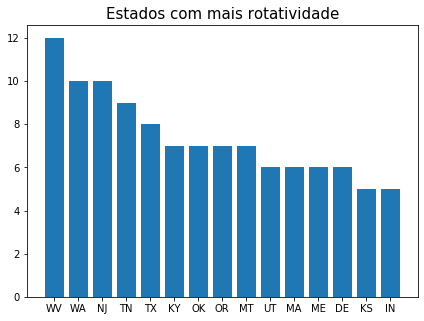

In [219]:
plt.figure(figsize=(7,5))
plt.bar(x=x.state.values, height=x.churn.values)
plt.title('Estados com mais rotatividade', fontsize=15);

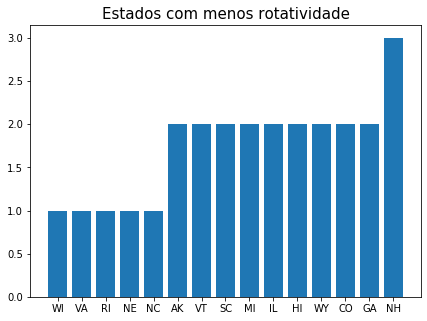

In [220]:
plt.figure(figsize=(7,5))
plt.bar(x=y.state.values, height=y.churn.values)
plt.title('Estados com menos rotatividade', fontsize=15);

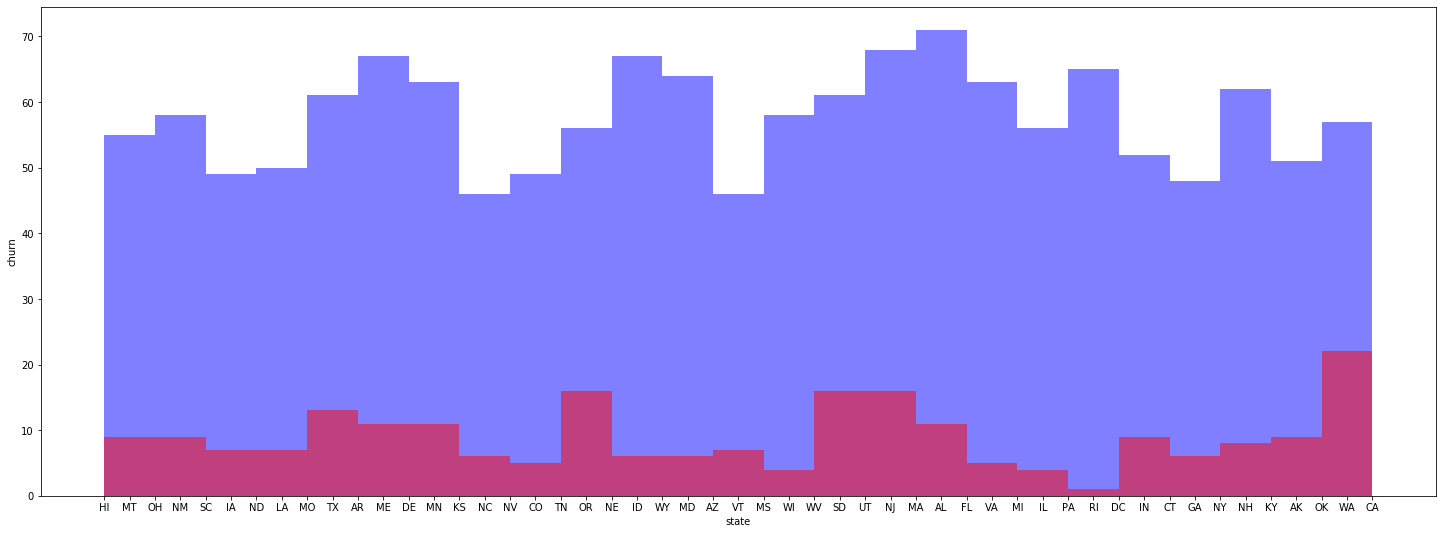

In [221]:
#churn por estddo
plt.figure(figsize=(25,9))
num_bins = 25;
plt.hist(dados.state[dados.churn=='no'], num_bins, facecolor = 'blue', alpha = 0.5)
plt.hist(dados.state[dados.churn=='yes'], num_bins, facecolor = 'red', alpha = 0.5)
plt.xlabel('state')
plt.ylabel('churn')
plt.show()

In [222]:
dados['area_code'].value_counts()

area_code_415    840
area_code_408    421
area_code_510    406
Name: area_code, dtype: int64

In [223]:
dados['account_length'].value_counts()

90     26
102    23
78     22
98     21
103    21
       ..
186     1
181     1
168     1
153     1
238     1
Name: account_length, Length: 198, dtype: int64

In [224]:
#account_lengh churn yes
dados[dados['churn'] == 'yes'].groupby(['account_length'])['churn'].count().sort_values(ascending = False)[:15].reset_index()


,account_length,churn
0,78,6
1,110,6
2,91,5
3,117,5
4,114,5
5,102,4
6,116,4
7,98,4
8,65,4
9,64,3


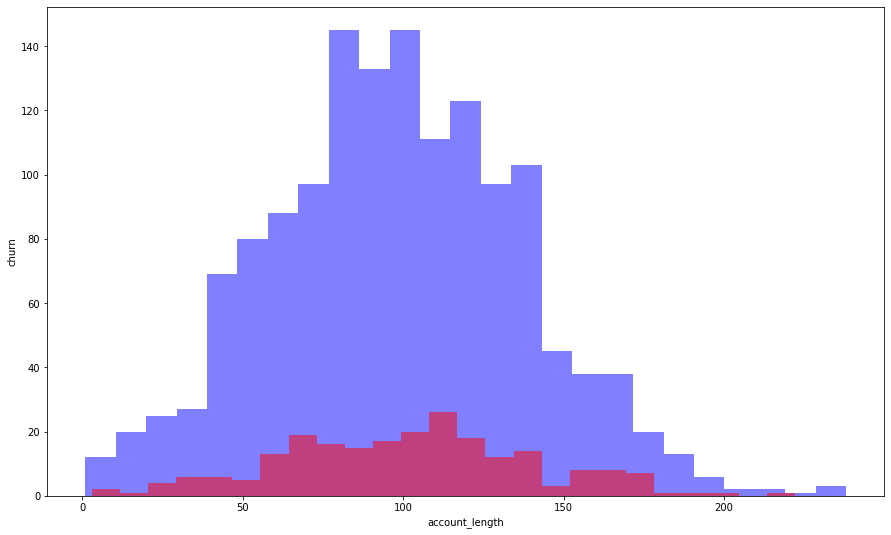

In [225]:
#churn por account_length
plt.figure(figsize=(15,9))
num_bins = 25;
plt.hist(dados.account_length[dados.churn=='no'], num_bins, facecolor = 'blue', alpha = 0.5)
plt.hist(dados.account_length[dados.churn=='yes'], num_bins, facecolor = 'red', alpha = 0.5)
plt.xlabel('account_length')
plt.ylabel('churn')
plt.show()

In [226]:
#codigo postal churn yes
dados[dados['churn'] == 'yes'].groupby(['area_code'])['churn'].count().sort_values(ascending = False)[:15].reset_index()

,area_code,churn
0,area_code_415,110
1,area_code_510,59
2,area_code_408,55


In [227]:
#codigo postal churn no
dados[dados['churn'] == 'no'].groupby(['area_code'])['churn'].count().sort_values(ascending = False)[:15].reset_index()

,area_code,churn
0,area_code_415,730
1,area_code_408,366
2,area_code_510,347


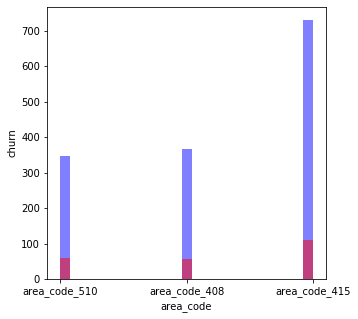

In [228]:
#churn por codgio postal
plt.figure(figsize=(5,5))
num_bins = 25;
plt.hist(dados.area_code[dados.churn=='no'], num_bins, facecolor = 'blue', alpha = 0.5)
plt.hist(dados.area_code[dados.churn=='yes'], num_bins, facecolor = 'red', alpha = 0.5)
plt.xlabel('area_code')
plt.ylabel('churn')
plt.show()

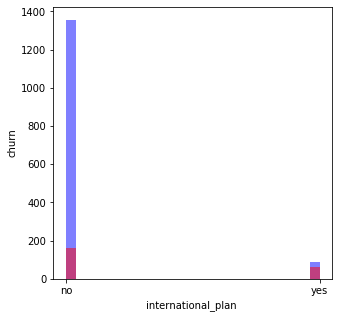

In [229]:
#churn por international_plan 
plt.figure(figsize=(5,5))
num_bins = 25;
plt.hist(dados.international_plan [dados.churn=='no'], num_bins, facecolor = 'blue', alpha = 0.5)
plt.hist(dados.international_plan [dados.churn=='yes'], num_bins, facecolor = 'red', alpha = 0.5)
plt.xlabel('international_plan ')
plt.ylabel('churn')
plt.show()

In [230]:
#international_plan churn yes
dados[dados['churn'] == 'yes'].groupby(['international_plan'])['churn'].count().sort_values(ascending = False)[:15].reset_index()

,international_plan,churn
0,no,162
1,yes,62


In [231]:
#international_plan churn yes
dados[dados['churn'] == 'no'].groupby(['international_plan'])['churn'].count().sort_values(ascending = False)[:15].reset_index()

,international_plan,churn
0,no,1355
1,yes,88


In [232]:
# Filtro apenas das variáveis numéricas
dados.iloc[:,5:19]

,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86
1,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57
2,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70
3,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24
4,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
1663,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
1664,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
1665,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30


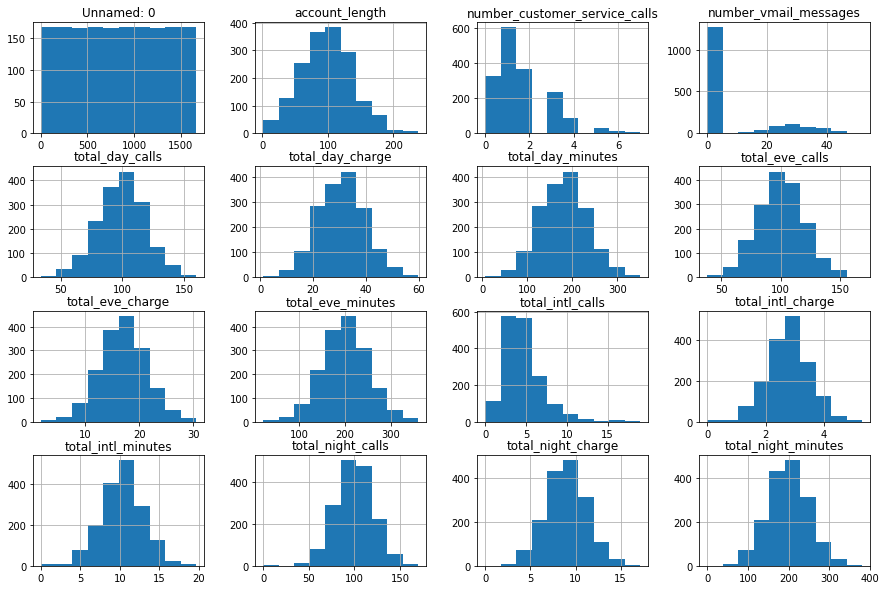

In [233]:
# Histogram das variáveis numéricas
plt.rcParams['figure.figsize']=(15,10)
dados.hist();

In [234]:
#colunas não numericas
dados_strings = dados.select_dtypes(object)
print(dados_strings)

     state      area_code international_plan voice_mail_plan churn
0       HI  area_code_510                 no              no    no
1       MT  area_code_510                 no              no    no
2       OH  area_code_408                 no             yes    no
3       NM  area_code_415                 no              no    no
4       SC  area_code_415                 no              no    no
...    ...            ...                ...             ...   ...
1662    HI  area_code_408                 no             yes    no
1663    WV  area_code_415                 no              no   yes
1664    DC  area_code_415                 no              no    no
1665    DC  area_code_510                 no              no    no
1666    VT  area_code_415                 no             yes    no

[1667 rows x 5 columns]


In [235]:
dados_strings.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,HI,area_code_510,no,no,no
1,MT,area_code_510,no,no,no
2,OH,area_code_408,no,yes,no
3,NM,area_code_415,no,no,no
4,SC,area_code_415,no,no,no


In [236]:
dados_strings.iloc[:,2:5].applymap(lambda x: 1 if x == 'yes' else 0)


,international_plan,voice_mail_plan,churn
0,0,0,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
1662,0,1,0
1663,0,0,1
1664,0,0,0
1665,0,0,0


In [237]:

# Importando SMOTE
from imblearn.over_sampling import SMOTE

# Porcetagem dos valores da classe
dados.churn.value_counts(normalize=True)

no     0.865627
yes    0.134373
Name: churn, dtype: float64

In [238]:
#porcentagem por estado
dados.state.value_counts(normalize=True)*100

WV    3.119376
ID    2.759448
NJ    2.639472
AL    2.639472
TX    2.639472
VA    2.459508
ME    2.459508
MN    2.459508
KY    2.399520
UT    2.399520
NH    2.339532
MA    2.279544
OH    2.279544
WY    2.279544
AR    2.219556
OR    2.159568
TN    2.159568
MS    2.039592
DC    2.039592
RI    2.039592
DE    1.979604
HI    1.979604
WA    1.919616
MD    1.919616
PA    1.919616
LA    1.859628
NY    1.859628
SC    1.859628
MT    1.859628
IL    1.799640
MI    1.799640
MO    1.799640
CO    1.799640
NM    1.739652
GA    1.739652
OK    1.739652
KS    1.739652
WI    1.679664
VT    1.679664
FL    1.619676
IN    1.619676
NE    1.619676
ND    1.559688
SD    1.499700
AZ    1.499700
IA    1.499700
CT    1.499700
NV    1.439712
NC    1.379724
AK    1.199760
CA    1.079784
Name: state, dtype: float64

In [239]:
#atribuir resultados anteriores as colunas do dataframe
dados_strings[['international_plan',
               'voice_mail_plan', 
               'churn']] = dados_strings.iloc[:,2:5].applymap(lambda x: 1 if x == 'yes' else 0)

In [240]:
dados_strings.dtypes

state                 object
area_code             object
international_plan     int64
voice_mail_plan        int64
churn                  int64
dtype: object

In [241]:

dados_strings.head()

,state,area_code,international_plan,voice_mail_plan,churn
0,HI,area_code_510,0,0,0
1,MT,area_code_510,0,0,0
2,OH,area_code_408,0,1,0
3,NM,area_code_415,0,0,0
4,SC,area_code_415,0,0,0


In [242]:
#substituir as colunas anteriores no dataframe original
dados[dados_strings.columns] = dados_strings

In [243]:
dados.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,0,0,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,2,MT,137,area_code_510,0,0,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,3,OH,103,area_code_408,0,1,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,4,NM,99,area_code_415,0,0,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,5,SC,108,area_code_415,0,0,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [244]:
dados.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [310]:

array = dados.values

# Separando o array em componentes de input e output
X = dados.iloc[:,4:20]
Y = dados.iloc[:,20]

In [311]:
X

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2
1663,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
1664,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1
1665,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0


In [312]:
# Importando SMOTE
from imblearn.over_sampling import SMOTE

# Porcetagem dos valores da classe
dados.churn.value_counts(normalize=True)

0    0.865627
1    0.134373
Name: churn, dtype: float64

In [313]:
import pandas as pd

In [314]:
# Balanceando
x_resampled, y_resampled = SMOTE().fit_resample(X, Y)

# Classe equilibrada - 50/50
pd.value_counts(y_resampled, normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [315]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

#gerando nova escala
X_scaled = MinMaxScaler(feature_range = (0, 1)).fit_transform(x_resampled)

print("dados originais: \n\n", dados.values)
print("dados normalizados: \n\n", X_scaled[0:5,:])

dados originais: 

 [[1 'HI' 101 ... 2.86 3 0]
 [2 'MT' 137 ... 2.57 0 0]
 [3 'OH' 103 ... 3.7 1 0]
 ...
 [1665 'DC' 61 ... 3.67 1 0]
 [1666 'DC' 109 ... 2.3 0 0]
 [1667 'VT' 86 ... 2.51 0 0]]
dados normalizados: 

 [[0.         0.         0.         0.18643085 0.70634921 0.18639154
  0.56261128 0.26717557 0.5625     0.61844864 0.42941176 0.61852068
  0.53807107 0.15789474 0.53759398 0.42857143]
 [0.         0.         0.         0.62916787 0.41269841 0.62909277
  0.66023739 0.77099237 0.66026536 0.24685535 0.47647059 0.24694234
  0.4822335  0.36842105 0.48308271 0.        ]
 [0.         1.         0.55769231 0.83531458 0.48412698 0.83526603
  0.6379822  0.51145038 0.63791899 0.78694969 0.74705882 0.78683751
  0.69543147 0.31578947 0.69548872 0.14285714]
 [0.         0.         0.         0.60945202 0.70634921 0.60948158
  0.30890208 0.38167939 0.30865922 0.57809224 0.48235294 0.5783343
  0.79695431 0.10526316 0.79699248 0.14285714]
 [0.         0.         0.         0.55320383 0.34920

In [316]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

#gerando nova escala
scaler = StandardScaler().fit(x_resampled)
standarX = scaler.transform(x_resampled)

#sumarizando dados
print('dados originais: \n\n', dados.values)
print('\nDados padronizados: \n\n', standarX[0:5,:])

dados originais: 

 [[1 'HI' 101 ... 2.86 3 0]
 [2 'MT' 137 ... 2.57 0 0]
 [3 'OH' 103 ... 3.7 1 0]
 ...
 [1665 'DC' 61 ... 3.67 1 0]
 [1666 'DC' 109 ... 2.3 0 0]
 [1667 'VT' 86 ... 2.51 0 0]]

Dados padronizados: 

 [[-0.31065183 -0.42923528 -0.45720933 -2.04892104  1.31688896 -2.0492433
   0.14891808 -1.42030461  0.14850832  0.64903128 -1.35363667  0.64899092
   0.05996399 -0.47044247  0.05636733  0.94927951]
 [-0.31065183 -0.42923528 -0.45720933  0.52389465 -0.74302515  0.52365142
   0.80952431  2.16506337  0.80992776 -2.12745024 -0.93368554 -2.12716918
  -0.3777565   1.22508919 -0.37116903 -1.27443857]
 [-0.31065183  2.32972465  2.03745639  1.72184616 -0.24196496  1.72189091
   0.65893019  0.31805562  0.65874617  1.9080423   1.48103349  1.90653052
   1.2935399   0.80120627  1.2947485  -0.53319921]
 [-0.31065183 -0.42923528 -0.45720933  0.40932264  1.31688896  0.40967496
  -1.56785497 -0.60544825 -1.56882     0.3474952  -0.88119164  0.3487479
   2.08939533 -0.89432539  2.09085068 -0

In [317]:
from sklearn.decomposition import PCA

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x_resampled)

# Seleção de atributos
pca = PCA(n_components = 10)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.32712637 0.15122897 0.11644679 0.08000713 0.06881611 0.0612585
 0.05899195 0.03725977 0.03574267 0.02799653]
[[ 2.86625468e-02  8.55856768e-01  5.05899434e-01 -6.13997572e-02
   6.43043694e-03 -6.13931943e-02 -2.98047039e-02  7.30708072e-03
  -2.98084866e-02 -1.77026786e-02 -2.12474337e-03 -1.77038247e-02
  -6.32177752e-03 -8.16157167e-04 -6.29237574e-03  2.51236953e-02]
 [ 9.75618133e-01 -4.85378913e-02 -9.68752981e-03 -1.42361897e-01
   3.33296159e-03 -1.42345455e-01 -1.72119271e-02 -1.38909449e-02
  -1.72230029e-02 -2.54735564e-02 -9.05882379e-04 -2.54718457e-02
   3.27057506e-02 -2.49323230e-02  3.27011248e-02 -1.82813330e-02]
 [ 1.91935836e-01  9.43249022e-02  2.48342064e-02  6.09249178e-01
  -2.70379316e-02  6.09183183e-01  1.84907871e-01 -9.83688591e-03
   1.84944415e-01  1.40536581e-01 -1.03202308e-02  1.40512817e-01
  -2.00122860e-02  1.69397705e-03 -1.99353223e-02 -3.18956360e-01]
 [-4.87763641e-02  1.62646944e-02  3.42037343e-03 -2.11096631e-01
   7.87450345e-0

In [318]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Definindo o tamanho das amostras
teste_size = 0.4

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 10

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_scaled, y_resampled, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 76.190%


In [319]:
#modelo  LogisticRegression

# Avaliação usando Cross Validation

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definindo os valores para os folds
num_folds =11
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo,X_scaled , y_resampled, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 74.567%
